In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time


# to see plots in notebook
%matplotlib inline  


In [2]:
pip install jax jaxlib sympy

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install --upgrade jax jaxlib


In [4]:
!pip show jaxlib

Name: jaxlib
Version: 0.4.23
Summary: XLA library for JAX
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /Users/aaditpatel/opt/anaconda3/lib/python3.9/site-packages
Requires: ml-dtypes, numpy, scipy
Required-by: 


# Question 1 


### How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

<span style='color:Black'> Number of multiplication needed: **nxmxk**
<br/>
Number of addition needed: **nxmx(k-1)**
<br/>
<br/>
So if we have to do multiplication between a matrix of (n,k) and (k,m) we would get a resultant matrix of (n,m) so while multiplying we have k elements so number of addition between them is k-1 and the number of elements being n*m so total additions are (k-1)xnxm.
<br/>
<br/>
The number of multiplications for each element is k and therefore the total number of multiplications for the whole matrix is nxmxk.  </span>

## Question 2

**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [24]:
import time 
begin = time.time()
A = [[1,2,3],
     [4,5,6],
     [7,8,9]]
B = [[1,2,3,4],
     [5,6,7,8],
     [2,4,6,8]]
result = [[0,0,0,0],
          [0,0,0,0],
          [0,0,0,0]]

for i in range(len(A)):
    
    for j in range(len(B[0])):
        
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]
time.sleep(1) 


print('Multiplied Matrix:')
for r in result:
    print(r)
end = time.time()
print(f"Total runtime of the program is {end - begin}") 

Multiplied Matrix:
[17, 26, 35, 44]
[41, 62, 83, 104]
[65, 98, 131, 164]
Total runtime of the program is 1.0155022144317627


In [23]:
import numpy as np
begin = time.time()

mat1 = ([1,2,3],
     [4,5,6],
     [7,8,9])
mat2 = ([1,2,3,4],
     [5,6,7,8],
     [2,4,6,8])

res = np.dot(mat1,mat2)
 


time.sleep(1) 
# store end time 
end = time.time()

print(res)
print(f"Total runtime of the program is {end - begin}") 

[[ 17  26  35  44]
 [ 41  62  83 104]
 [ 65  98 131 164]]
Total runtime of the program is 1.016845941543579


This shows that the method for numpy takes a much less time rather than the looping method.

The substantial reduction in time observed when using the np.dot() function  can be attributed to the following reasons:

-When employing loops , the computation is executed in a high-level language (Python), and the speed is constrained by the Python interpreter. The interpretative nature of Python can lead to slower execution times for numerical operations.
</br>
-In contrast, the np.dot() function is implemented in the lower-level language C. The use of C offers significantly faster computation speeds compared to Python. 

## Question 3

**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array?** 

**Can you suggest a better method?**

**Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

The better method can be the sorting methods like the quick sort.And we can see that the time taken by numpy method is lesser than the time taken by the sorting method.

In [27]:
ar = [20, 2, 7, 1, 34] 

In [30]:
begin = time.time()  
def partition(ar, low, high):
    i = low - 1
    pivot = ar[high]

    for j in range(low, high):
        if ar[j] <= pivot:
            i = i + 1
            temp = ar[i]
            ar[i] = ar[j]
            ar[j] = temp
            
    temp = ar[i + 1]
    ar[i + 1] = ar[high]
    ar[high] = temp

    return i + 1

# performing quick sort using above function
def quickSort(ar, low, high):
    if low < high:
        piv = partition(ar, low, high)
        quickSort(ar, low, piv - 1)
        quickSort(ar, piv + 1, high)

n = len(ar)
quickSort(ar, 0, n - 1)
 
if n % 2 == 0:
    median = (ar[n // 2] + ar[n // 2 - 1]) / 2  # if n==even -> average of the two middle elements
else:
    median = ar[n // 2]  # if n==odd -> middle element
        
print('Median using Quick Sort:', median)


end = time.time()
print(f"Total runtime of the program is {end - begin}") 

Median using Quick Sort: 7
Total runtime of the program is 0.0009169578552246094


In [31]:

import numpy as np 
begin = time.time()   
# 1D array  
arr = [20, 2, 7, 1, 34] 
  
print("arr : ", arr)  
print("median of arr : ", np.median(arr)) 
# store end time 
end = time.time()
print(f"Total runtime of the program is {end - begin}") 

arr :  [20, 2, 7, 1, 34]
median of arr :  7.0
Total runtime of the program is 0.008774042129516602


# Question 4 

**What is the gradient of the following function with respect to x and y?**

$$x^2y + y^3 sin(x)$$

Gradient w.r.t. x: 

$2xy + y^3 cos(x)$

Gradient w.r.t. y:

$x^2 + 3y^2sin(x)$

## Question 5

**Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:

import jax
import jax.numpy as jnp
import numpy as np
# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Define the gradients using JAX with smaller step size
grad_x = jax.grad(f, argnums=0)
grad_y = jax.grad(f, argnums=1)

# Number of iterations
n_iterations = 10

for i in range(n_iterations):
    # Generate random values for x and y
    random_x = np.random.rand()
    random_y = np.random.rand()

    # Evaluate the analytical gradients
    analytical_grad_x = 2 * random_x * random_y + random_y**3 * jnp.cos(random_x)
    analytical_grad_y = random_x**2 + 3 * random_y**2 * jnp.sin(random_x)

    # Evaluate the gradients using JAX
    jax_grad_x = grad_x(random_x, random_y)
    jax_grad_y = grad_y(random_x, random_y)

    # Compare the results
    print("\nRandom x:", random_x)
    print("Random y:", random_y)

    print("Analytical Gradient w.r.t. x:", analytical_grad_x)
    print("JAX Gradient w.r.t. x:", jax_grad_x)

    print("Analytical Gradient w.r.t. y:", analytical_grad_y)
    print("JAX Gradient w.r.t. y:", jax_grad_y)

Please run the Question 5 and 6 codes in collab file as in jupyter I think I have some mac issues and the jax version issues.

In [ ]:
pip install sympy 

## Question 6

**Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradients symbolically
grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)

# Display the symbolic gradients
print("Symbolic Gradient w.r.t. x:", grad_x)
print("Symbolic Gradient w.r.t. y:", grad_y)


## Question 7
**Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [7]:

students_data = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70  
            }
        },
        'Branch 2': {
 
        }
    },
    2023: {
        'Branch 1': {
           
        },
        'Branch 2': {
            
        }
    },
    2024: {
        'Branch 1': {
            
        },
        'Branch 2': {
            
        }
    },
    2025: {
        'Branch 1': {
            
        },
        'Branch 2': {
           
        }
    }
  
}



## Question 8

**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

## Question 9

**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

In [9]:
x = np.arange(0.5, 100.5, 0.5)

import matplotlib.pyplot as plt

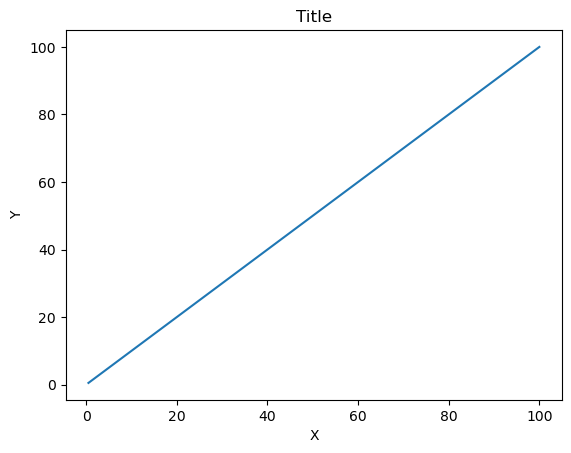

In [10]:
y = x

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

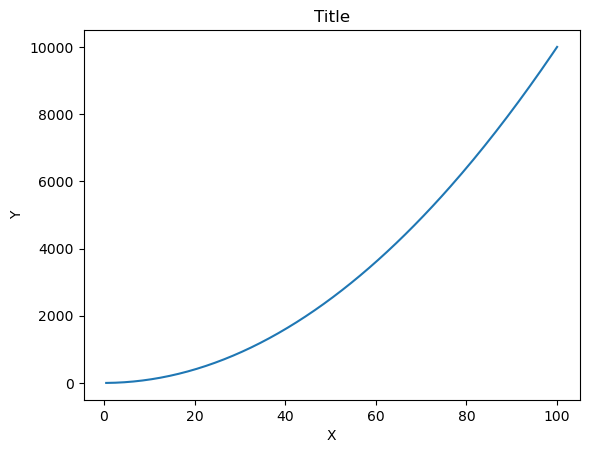

In [11]:


y = x**2

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

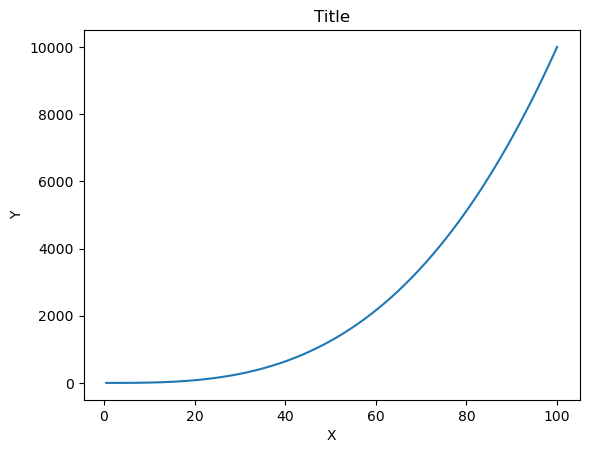

In [12]:

y = (x**3) / 100

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

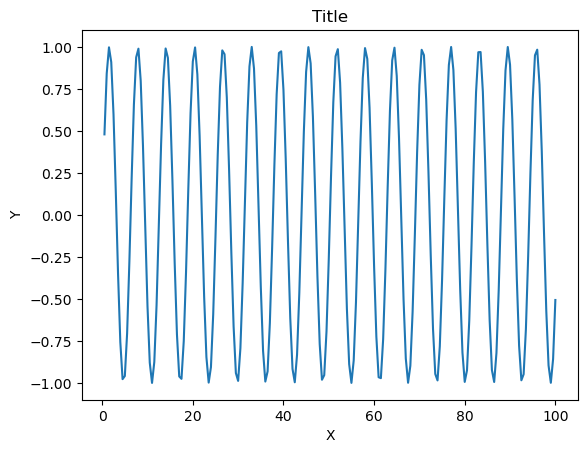

In [13]:


y = np.sin(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

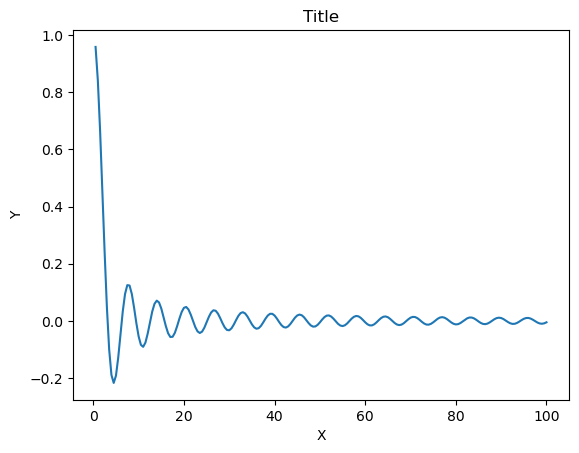

In [14]:


y = np.sin(x) / x

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

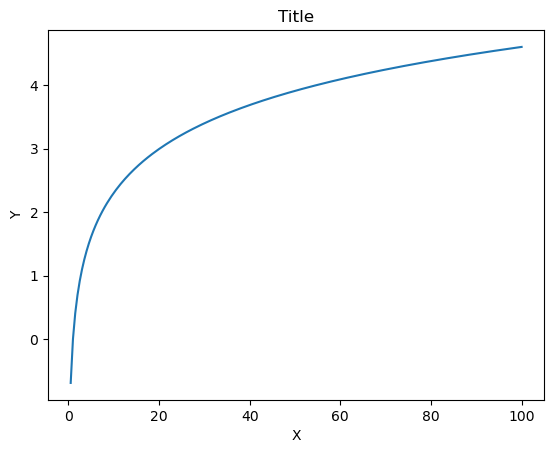

In [15]:
y = np.log(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

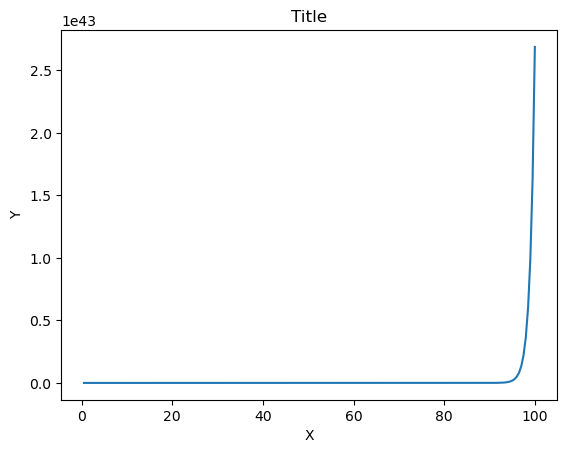

In [16]:
y = np.exp(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

## Question 10

**Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2.**

**Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [17]:
import numpy as np
import pandas as pd


np.random.seed(42)  
matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

max_std_column = df.std().idxmax()


min_mean_row = df.mean(axis=1).idxmin()
print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

## Question 11

**Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.**

**Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.**

**Find the number of rows in the dataframe where the value in the column “g” is “LT8”.**

**Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [18]:
import numpy as np
import pandas as pd


np.random.seed(42)  
matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])


df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)


df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')


num_lt8_rows = (df['g'] == 'LT8').sum()


std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()


print("DataFrame:")
print(df)
print("\nNumber of rows where 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' for rows where 'g' is 'GT8':", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.0

## Question 12

**Write a small piece of code to explain broadcasting in numpy**

In [19]:
import numpy as np


a = np.array([1, 2, 3])
b = 2

result = a + b


print("Array a:", a)
print("Scalar b:", b)
print("Result of broadcasting:", result)


Array a: [1 2 3]
Scalar b: 2
Result of broadcasting: [3 4 5]



## Question 13
**Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [20]:
import numpy as np

def custom_argmin(arr):
  
  
    argmin_np = np.argmin(arr)


    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_index = i
            min_value = arr[i]


    assert min_index == argmin_np, "Custom argmin does not match np.argmin result"

    return min_index


arr_example = np.array([4, 2, 7, 1, 9, 3])


min_index_custom = custom_argmin(arr_example)
print("Custom argmin result:", min_index_custom)


min_index_np = np.argmin(arr_example)
print("np.argmin result:", min_index_np)

Custom argmin result: 3
np.argmin result: 3
